In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('F:\Data Science And Machine Learning\class 09\weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
#One Hot Encoding
dummy_variables = pd.get_dummies(df['Gender'], drop_first=True)  #true means it will drop one dummy variable

In [6]:
dummy_variables

,Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [7]:
new_df = df.drop('Gender',axis=1)

In [8]:
new_df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [9]:
df = pd.concat([new_df,dummy_variables], axis=1) #Concat two data frame

In [10]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [11]:
df.tail()

,Height,Weight,Male
8550,60.483946,110.565497,0
8551,63.423372,129.921671,0
8552,65.584057,155.942671,0
8553,67.429971,151.678405,0
8554,60.921791,131.253738,0


In [12]:
x = df.drop('Weight', axis=1)

In [13]:
y = df['Weight']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#split dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [16]:
xtrain.shape

(5988, 2)

In [17]:
xtest.shape

(2567, 2)

In [18]:

#Linear Regression
from sklearn.linear_model import LinearRegression

In [19]:
reg  = LinearRegression() #create linear reg object

In [20]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [21]:
reg.coef_   # coefficient in linear regression

array([ 5.9562333 , 19.54151693])

In [22]:
reg.intercept_  # value of intercept

-243.79306041624113

In [23]:
reg.predict(xtest)

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [24]:
pred = reg.predict(xtest)

In [25]:
pred

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [26]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
mean_squared_error(ytest, pred)

96.83734437830611

In [28]:
r2_score(ytest,pred)

0.905911242442266

# So, Our Model Accuracy is 90.59%


# K- nearest neighbors algorithm

In [29]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
knn= KNeighborsRegressor(n_neighbors=100)

In [31]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [32]:
pred2=knn.predict(xtest)

In [35]:
pred2

array([142.71846277, 185.09590868, 196.963273  , ..., 103.84821427,
       191.77975045, 143.65918106])

In [33]:
mean_squared_error(ytest,pred2)

98.99309617416073

In [34]:
r2_score(ytest,pred2)

0.903816678517811

# our KNN Regressor model accuracy is 90.38%

# KNN Classifier

In [42]:
import pandas as pd
import numpy as np

In [43]:
data=pd.read_csv('F:\Data Science And Machine Learning\class 09\diabetes.CSV.csv')

In [44]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
x = data.drop('Outcome', axis=1)

In [47]:
y=data['Outcome']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#split dataset into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [50]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier=  KNeighborsClassifier(n_neighbors=100)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=100)

In [51]:
pred3=classifier.predict(xtest)

In [53]:
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

In [55]:
print(classification_report(ytest,pred3)) #Classifier Report

              precision    recall  f1-score   support

           0       0.73      0.90      0.80       151
           1       0.66      0.36      0.47        80

    accuracy                           0.71       231
   macro avg       0.69      0.63      0.64       231
weighted avg       0.70      0.71      0.69       231



In [56]:
print(confusion_matrix(ytest,pred3))  #confusion Matrix

[[136  15]
 [ 51  29]]


C:\Users\proloy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


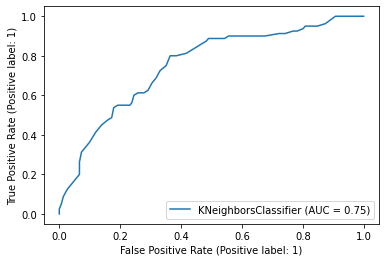

In [57]:
#ROC cruve
plot_roc_curve(classifier,xtest,ytest) 

C:\Users\proloy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


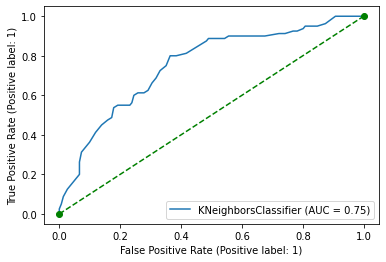

In [59]:
from matplotlib import pyplot as plt
plot_roc_curve(classifier,xtest,ytest)
plt.plot([0,1],[0,1],'go--')